# Cogito Computer Vision Course

Welcome to the Cogito Computer Vision Course!

One can either run the code here locally, or in a Google Colab notebook: https://colab.research.google.com/github/CogitoNTNU/course-computer-vision/blob/main/course.ipynb 

In this course you will learn about the fundamentals of computer vision, including image processing, feature extraction, and object classification.
An additional resource for learning about convolutional neural networks (CNNs) can be found in [this link](https://poloclub.github.io/cnn-explainer/).

In [1]:
! pip install torch torchvision matplotlib

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 10.7 MB/s  0:00:00


In [1]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt


# Define transforms
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Load datasets
dataset = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)


# Fashion MNIST
A dataset of fashion images, to practice computer vision. The dataset contains 60,000 training images and 10,000 test images of clothing items, such as shirts, shoes, and bags.

In [2]:
class_names = dataset.classes
print("The class names are: ", class_names)

The class names are:  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Lets look at a picture from the dataset.

This is a Ankle boot
The shape of the image is (128, 128, 1)


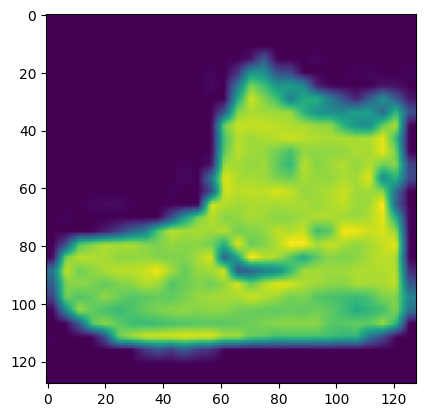

In [3]:
first_image, first_label = dataset[0]
img = first_image.numpy().transpose((1, 2, 0))
print(f"This is a {class_names[first_label]}")
print(f"The shape of the image is {img.shape}")
plt.imshow(img)

# Max Pooling
We can also apply max pooling to the image. Max pooling is a downsampling technique that reduces the spatial dimensions of the image, while retaining the most important features. Here, we use a kernel size of 2 and a stride of 4.

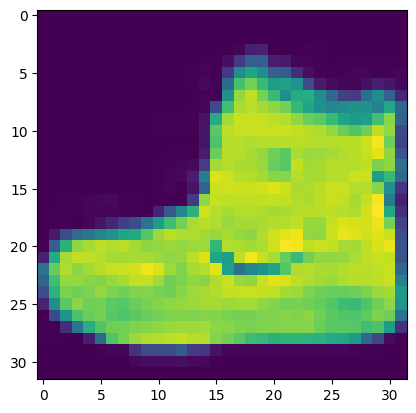

In [4]:
img = dataset[0][0].unsqueeze(0)  # Add batch dimension
pool = torch.nn.MaxPool2d(kernel_size=2, stride=4)
pooled_img = pool(img)
plt.imshow(pooled_img.squeeze(0).permute(1, 2, 0).numpy())


This can be done multiple times. You can see how the image gets smaller and smaller.

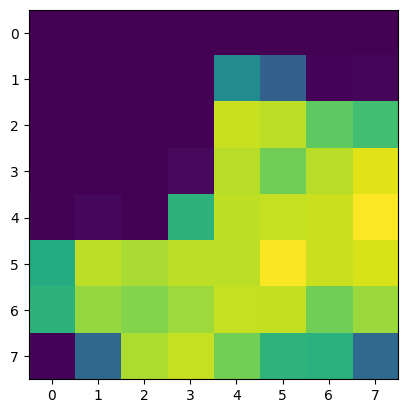

In [5]:
dobbel_pooled = pool(pooled_img)
plt.imshow(dobbel_pooled.squeeze(0).permute(1, 2, 0).numpy())

# CNN Filters
Lets look at the filters in a convolutional neural network. Here is an example picture of a cat: 

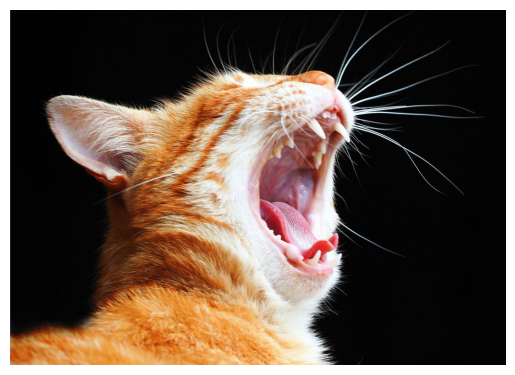

In [6]:
import requests
from io import BytesIO

url = "https://cdn.britannica.com/70/234870-050-D4D024BB/Orange-colored-cat-yawns-displaying-teeth.jpg"

# Download the image
response = requests.get(url)
image = plt.imread(BytesIO(response.content), format="jpg")

plt.imshow(image)
plt.axis("off")
plt.show()

If we apply a filter to the image, we can see how it highlights certain features. For example, a filter that detects edges will highlight the edges in the image.

In [ ]:
filter = torch.tensor([[[[-1, -1, -1],
                         [-1,  8, -1],
                         [-1, -1, -1]]]], dtype=torch.float32)  # Edge detection filter
conv_layer = torch.nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, padding=1, bias=False)
nn.ReLU(inplace=True) = torch.nn.ReLU()
conv_layer.weight = torch.nn.Parameter(filter.repeat(1, 3, 1, 1))  # Repeat filter for 3 input channels
image_tensor = torch.tensor(image).permute(2, 0, 1).unsqueeze(0).float()  # Add batch dimension and convert to float

Without Relu:

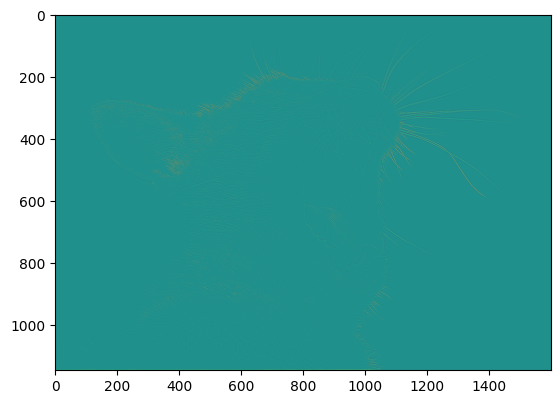

In [8]:
filtered_image = conv_layer(image_tensor)
plt.imshow(filtered_image.squeeze(0).permute(1, 2, 0).detach().numpy())

With Relu:

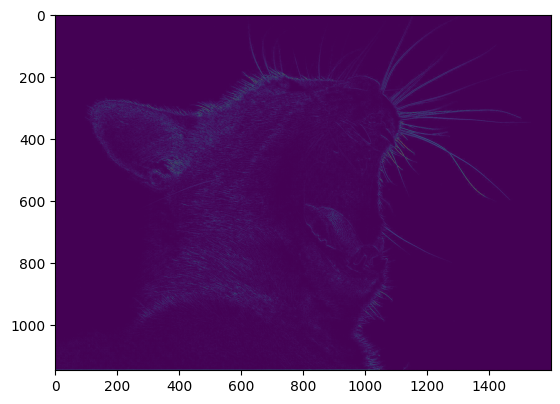

In [ ]:
filtered_image = conv_layer(image_tensor)
filtered_image = nn.ReLU(inplace=True)(filtered_image)
plt.imshow(filtered_image.squeeze(0).permute(1, 2, 0).detach().numpy())

# Task 1 - Experiment with Filters
We can see how another filter might affect the image. Try to change the filter values and see how it affects the image.

Here are some examples of filters:
![image.png](https://miro.medium.com/v2/resize:fit:1400/1*UaO9cemImbhwMVQOoUTPLQ.png)


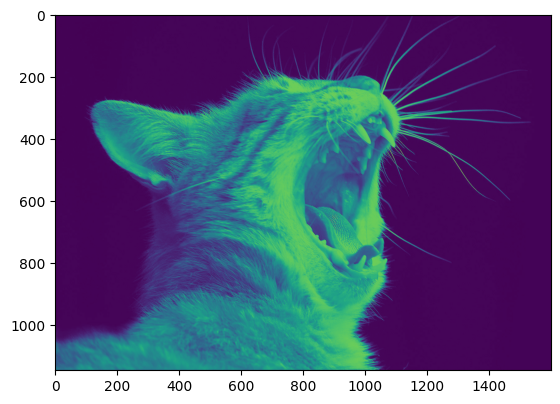

In [ ]:
filter = torch.tensor([[[[ 0, 1, 0],
                         [-1, 1, 1],
                         [ 0, 0, 1]]]], dtype=torch.float32)  # Another filter
conv_layer.weight = torch.nn.Parameter(filter.repeat(1, 3, 1, 1))  # Repeat filter for 3 input channels
filtered_image = conv_layer(image_tensor)
filtered_image = nn.ReLU(inplace=True)(filtered_image)
plt.imshow(filtered_image.squeeze(0).permute(1, 2, 0).detach().numpy())

# Task 2 - Explore Data Augmentation

Uncomment a transformation and run the cell to see what it does. You can experiment with the parameter values too, if you like. (The factor parameters should be greater than 0 and, generally, less than 1.) Run the cell again if you'd like to get a new random image.



In [11]:
from torchvision.transforms import RandomVerticalFlip, RandomRotation, ColorJitter, GaussianBlur, RandomResizedCrop

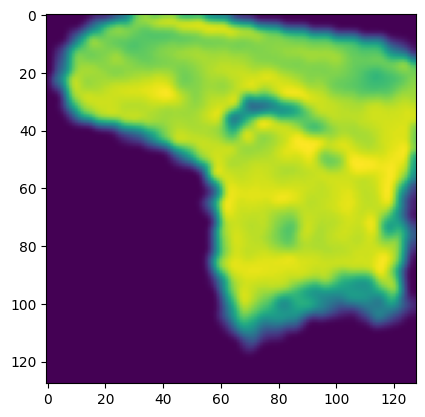

In [12]:
# Try to change some of the parameters below and see how the image changes. Also try to add/remove transforms.
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    RandomVerticalFlip(p=0.5),
    RandomRotation(degrees=30),
    RandomResizedCrop(size=128, scale=(0.8, 1.0), ratio=(0.75, 1.33)),
    ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    GaussianBlur(kernel_size=5, sigma=(0.1, 2.0)),
    transforms.ToTensor(),

])
dataset = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
image, label = dataset[0]
plt.imshow(image.permute(1, 2, 0).numpy())

# Create a model


In [13]:
from torch.nn import Conv2d, MaxPool2d, Flatten, Linear, Sequential
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device: ", device) # The device should be CUDA

class_names = dataset.classes
# Create a model
model = Sequential(
    Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1),
    MaxPool2d(kernel_size=2, stride=2),
    Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
    MaxPool2d(kernel_size=2, stride=2),
    Flatten(),
    Linear(in_features=32*32*32, out_features=128),
    Linear(in_features=128, out_features=10)
).to(device)
# Test the model with the first image
img = dataset[0][0].unsqueeze(0).to(device)  # Add batch dimension
output = model(img)
predicted_class = torch.argmax(output, dim=1).item()
print(f"The model predicts this image as a {class_names[predicted_class]}")

Using device:  cpu
The model predicts this image as a Sandal


This model is not trained, so the output will be random. 

# Training a model
Below is an example of how to train a model on the Fashion MNIST dataset.

In [14]:
training_data = datasets.FashionMNIST(root='data/FashionMNIST', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='data/FashionMNIST', train=False, download=True, transform=transform)

train_loader = DataLoader(training_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)

loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


100%|██████████| 26.4M/26.4M [00:01<00:00, 17.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 235kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 10.9MB/s]
100%|██████████| 5.15k/5.15k [00:00<?, ?B/s]


In [15]:
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        if i % 10 == 0:
            print(f"Training on batch number: {i}")
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")



Training on batch number: 0
Training on batch number: 10
Training on batch number: 20
Training on batch number: 30
Training on batch number: 40
Training on batch number: 50
Training on batch number: 60
Training on batch number: 70
Training on batch number: 80
Training on batch number: 90
Training on batch number: 100
Training on batch number: 110
Training on batch number: 120
Training on batch number: 130
Training on batch number: 140
Training on batch number: 150
Training on batch number: 160
Training on batch number: 170
Training on batch number: 180
Training on batch number: 190
Training on batch number: 200
Training on batch number: 210
Training on batch number: 220
Training on batch number: 230
Training on batch number: 240
Training on batch number: 250
Training on batch number: 260
Training on batch number: 270
Training on batch number: 280
Training on batch number: 290
Training on batch number: 300
Training on batch number: 310
Training on batch number: 320
Training on batch num

We can then evaluate the model on the test data.

In [16]:
total = 0
correct = 0
model.eval()
for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

Accuracy of the model on the test images: 72.21%


# Task 3 - Design your own model
Now you can try to create your own model and train it on the Fashion MNIST dataset!

In [23]:
model = Sequential(
    Conv2d(1, 16, 3, 1, 1),
    torch.nn.BatchNorm2d(16),
    torch.nn.ReLU(inplace=True),

    Conv2d(16, 32, 3, 1, 1),
    torch.nn.BatchNorm2d(32),
    torch.nn.ReLU(inplace=True),
    MaxPool2d(2, 2),

    Conv2d(32, 64, 3, 1, 1),
    torch.nn.BatchNorm2d(64),
    torch.nn.ReLU(inplace=True),
    MaxPool2d(2, 2),

    torch.nn.AdaptiveAvgPool2d(1),
    Flatten(),
    torch.nn.Dropout(0.2),
    Linear(64, 10),
).to(device)

transform = transforms.Compose([
    # transforms.Resize((128, 128))
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize((0.2860,), (0.3530,)),  # FashionMNIST
])

training_data = datasets.FashionMNIST(root='data/FashionMNIST', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='data/FashionMNIST', train=False, download=True, transform=transform)

train_loader = DataLoader(training_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)

loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


# Training

In [30]:
batch_size = 32
learning_rate = 0.001
epochs = 40
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

Epoch [1/40], Loss: 0.2858
Epoch [2/40], Loss: 0.2855
Epoch [3/40], Loss: 0.2833
Epoch [4/40], Loss: 0.2816
Epoch [5/40], Loss: 0.2789
Epoch [6/40], Loss: 0.2794
Epoch [7/40], Loss: 0.2749
Epoch [8/40], Loss: 0.2755
Epoch [9/40], Loss: 0.2717
Epoch [10/40], Loss: 0.2710
Epoch [11/40], Loss: 0.2689
Epoch [12/40], Loss: 0.2686
Epoch [13/40], Loss: 0.2684
Epoch [14/40], Loss: 0.2650
Epoch [15/40], Loss: 0.2633
Epoch [16/40], Loss: 0.2644
Epoch [17/40], Loss: 0.2637
Epoch [18/40], Loss: 0.2614
Epoch [19/40], Loss: 0.2598
Epoch [20/40], Loss: 0.2592
Epoch [21/40], Loss: 0.2576
Epoch [22/40], Loss: 0.2593
Epoch [23/40], Loss: 0.2555
Epoch [24/40], Loss: 0.2541
Epoch [25/40], Loss: 0.2563
Epoch [26/40], Loss: 0.2551
Epoch [27/40], Loss: 0.2529
Epoch [28/40], Loss: 0.2509
Epoch [29/40], Loss: 0.2506
Epoch [30/40], Loss: 0.2500
Epoch [31/40], Loss: 0.2476
Epoch [32/40], Loss: 0.2460
Epoch [33/40], Loss: 0.2467
Epoch [34/40], Loss: 0.2457
Epoch [35/40], Loss: 0.2421
Epoch [36/40], Loss: 0.2411
E

# Testing

In [31]:
total = 0
correct = 0
model.eval()
for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

Accuracy of the model on the test images: 90.99%
